# CLASSIFICATION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fPath = 'Walmart_Sales.csv'
df = pd.read_csv(fPath)

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,5.73,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,3.62,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,4.41,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,8.13,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,8.06,2.625,211.350143,8.106


In [38]:
# da data a anno mese giorno
# calcolo varianza

In [8]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
# cambiare da fahreneit a celsius

print(df['Temperature'])
df['Temperature'] = round(((df['Temperature'] - 32) * 5/9), 2)
print(df['Temperature'])

0       42.31
1       38.51
2       39.93
3       46.63
4       46.50
        ...  
6430    64.88
6431    64.89
6432    54.47
6433    56.47
6434    58.85
Name: Temperature, Length: 6435, dtype: float64
0        5.73
1        3.62
2        4.41
3        8.13
4        8.06
        ...  
6430    18.27
6431    18.27
6432    12.48
6433    13.59
6434    14.92
Name: Temperature, Length: 6435, dtype: float64


In [41]:
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'])  # convert to pandas datetime format
df.dtypes

C:\Users\matti\AppData\Local\Temp\ipykernel_8012\3936922801.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])  # convert to pandas datetime format


Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [14]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,15.924331,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,10.247221,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-18.920000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,8.590000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,17.040000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,23.855000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,37.860000,4.468000,227.232807,14.313000


In [15]:
# manage "Date" column

df['Year'] = df['Date'].dt.year

# Extract month from the 'date' column
df['Month'] = df['Date'].dt.month

# Extract month name from the 'date' column
df['Month_Name'] = df['Date'].dt.month_name()

# Extract day from the 'date' column
df['Day'] = df['Date'].dt.day

In [16]:
df = df.drop(columns=['Date', "Month_Name"])

In [17]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day
0,1,1643690.90,0,5.73,2.572,211.096358,8.106,2010,5,2
1,1,1641957.44,1,3.62,2.548,211.242170,8.106,2010,12,2
2,1,1611968.17,0,4.41,2.514,211.289143,8.106,2010,2,19
3,1,1409727.59,0,8.13,2.561,211.319643,8.106,2010,2,26
4,1,1554806.68,0,8.06,2.625,211.350143,8.106,2010,5,3


In [47]:
# modelli senza normalizzazione

# logistic

# decision tree

# random forest

In [48]:
# cosa voglio predire?

# quanti store ci sono?
print(len(df['Store'].value_counts()))  # 45 

45


In [49]:
# si potrebbe fare holiday flag, ma è sbilanciato (91,9)

In [50]:
# regressione sul fuel price? sarebbe da controllare quanto oscilla

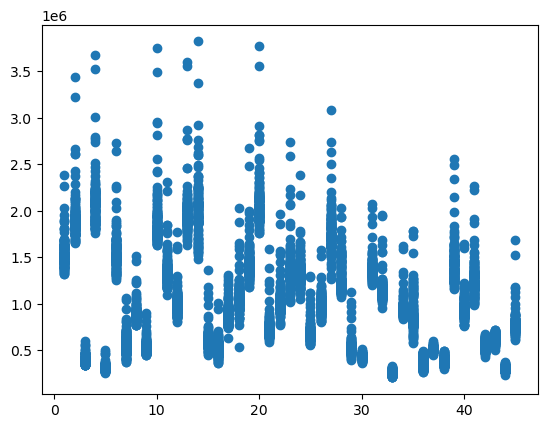

In [7]:
# allora si fa classificazione sul prezzo --> o classificazione binaria a seconda della mediana
#                                         --> altrimenti vado di clustering e faccio decidere al kmeans con 3 cluster

plt.scatter(x=df['Store'], y=df['Weekly_Sales'])


c:\Users\matti\anaconda3\envs\shelfManagement\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\matti\anaconda3\envs\shelfManagement\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


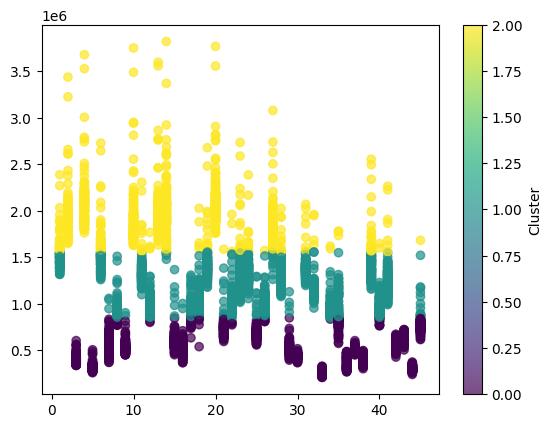

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(df)

plt.scatter(df['Store'], df['Weekly_Sales'], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.show()

In [10]:
'''
# silhouette analysis

from yellowbrick.cluster import SilhouetteVisualizer

fig,axes = plt.subplots(4,1, figsize=(8,20))

for i in range(2,6):
    model = KMeans(i)
    visualizer = SilhouetteVisualizer(model, ax=axes[i - 2], colors='yellowbrick')
    visualizer.fit(df)        # Fit the data to the visualizer
plt.show()
'''

"\n# silhouette analysis\n\nfrom yellowbrick.cluster import SilhouetteVisualizer\n\nfig,axes = plt.subplots(4,1, figsize=(8,20))\n\nfor i in range(2,6):\n    model = KMeans(i)\n    visualizer = SilhouetteVisualizer(model, ax=axes[i - 2], colors='yellowbrick')\n    visualizer.fit(df)        # Fit the data to the visualizer\nplt.show()\n"

In [13]:
len(kmeans.labels_)

6435

In [19]:
df['Label'] = kmeans.labels_

([<matplotlib.patches.Wedge at 0x2a9f10e3280>,
 [Text(0.2661140696149358, 1.0673253027793248, '0'),
  Text(-0.8237178445519098, -0.729032861102129, '1'),
  Text(0.906652813604529, -0.6228809481618387, '2')],
 [Text(0.14515312888087403, 0.5821774378796316, '42.2%'),
  Text(-0.44930064248285984, -0.39765428787388846, '38.6%'),
  Text(0.49453789832974304, -0.339753244451912, '19.2%')])

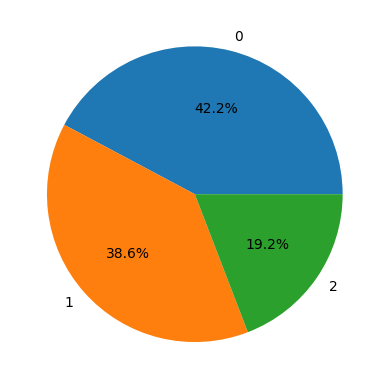

In [20]:
a,b,c = df['Label'].value_counts()
plt.pie([a,b,c], labels=[0,1,2], autopct='%1.1f%%')

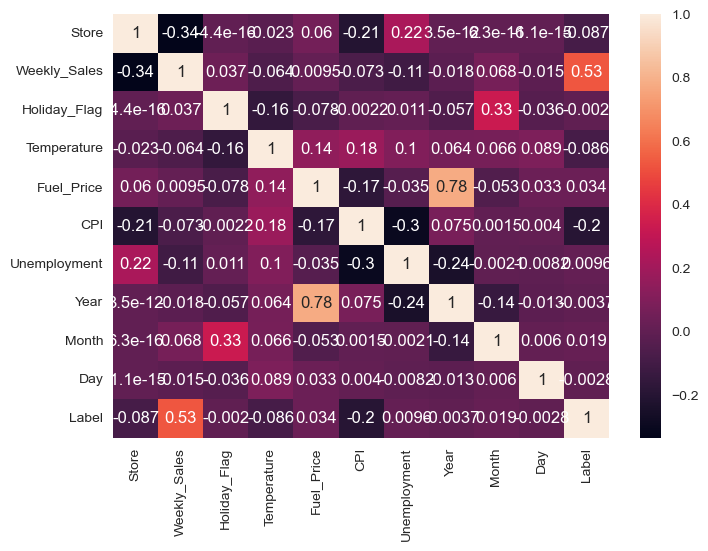

In [ ]:
import seaborn as sb

dataPlot = sb.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

In [21]:
df = df.drop(columns=['Fuel_Price','Weekly_Sales'])

In [115]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Definizione delle features (X) e target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
'''
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
'''

Logistic Regression Accuracy: 0.5547785547785548


c:\Users\matti\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:

# Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))


Decision Tree Accuracy: 0.9168609168609169


In [42]:

# Random Forest
forest = RandomForestClassifier(random_state=42, n_estimators=5)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Random Forest Accuracy: 0.8492618492618492


In [43]:

# Random Forest
forest = RandomForestClassifier(random_state=42, n_estimators=100)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Random Forest Accuracy: 0.9199689199689199


In [117]:

# Random Forest
forest = RandomForestClassifier(random_state=42, n_estimators=1000)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_forest))


Random Forest Accuracy: 0.9246309246309247


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_forest, labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       532
           1       0.91      0.87      0.89       255
           2       0.91      0.91      0.91       500

    accuracy                           0.92      1287
   macro avg       0.92      0.91      0.92      1287
weighted avg       0.92      0.92      0.92      1287



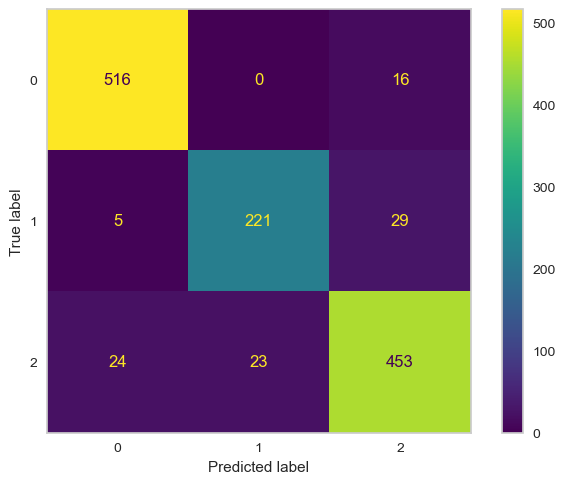

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test,y_pred_forest)
cmd = ConfusionMatrixDisplay(cm, display_labels=[0,1,2])

cmd.plot()
plt.grid(False)
plt.show()

In [52]:
# modelli con normalizzazione

# SVC

# Deep Learning (MLP?)

In [73]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

redDf = scaler.fit_transform(X)

redDf = pd.DataFrame(data=redDf,columns=X.columns)
redDf.head()

,Store,Holiday_Flag,Temperature,CPI,Unemployment,Year,Month,Day
0,0.0,0.0,0.434132,0.840500,0.405118,0.0,0.363636,0.033333
1,0.0,1.0,0.396971,0.841941,0.405118,0.0,1.000000,0.033333
2,0.0,0.0,0.410884,0.842405,0.405118,0.0,0.090909,0.600000
3,0.0,0.0,0.476400,0.842707,0.405118,0.0,0.090909,0.833333
4,0.0,0.0,0.475167,0.843008,0.405118,0.0,0.363636,0.066667


In [ ]:
# PARENTESI: QQ-PLOT E ISTOGRAMMA PER MOSTRARE SE SEGUE UNA GAUSSIANA O NO

boh = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])

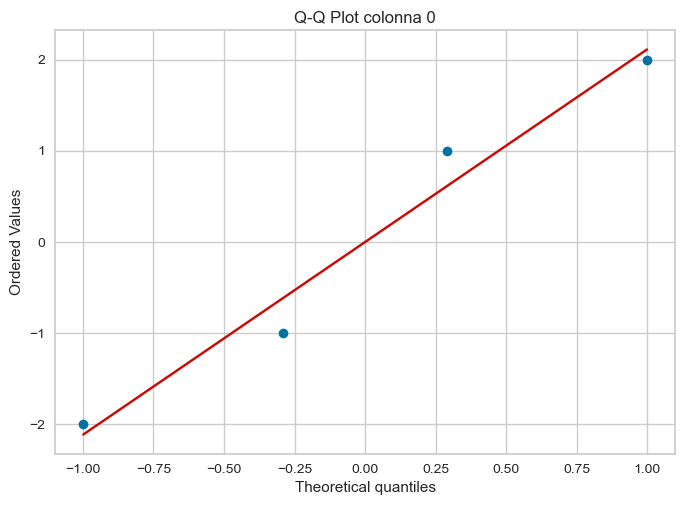

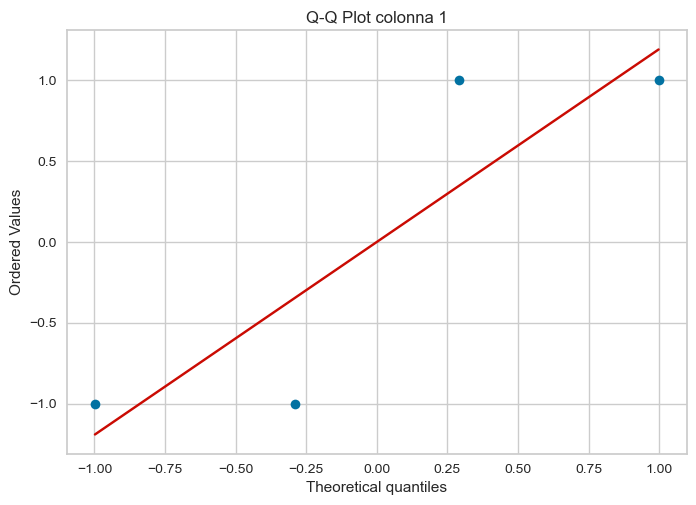

In [83]:
import scipy.stats as stats

# Grafico Q-Q per ogni colonna
for i in range(boh.shape[1]):
    plt.figure()
    stats.probplot(boh[:, i], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot colonna {i}")
    plt.show()

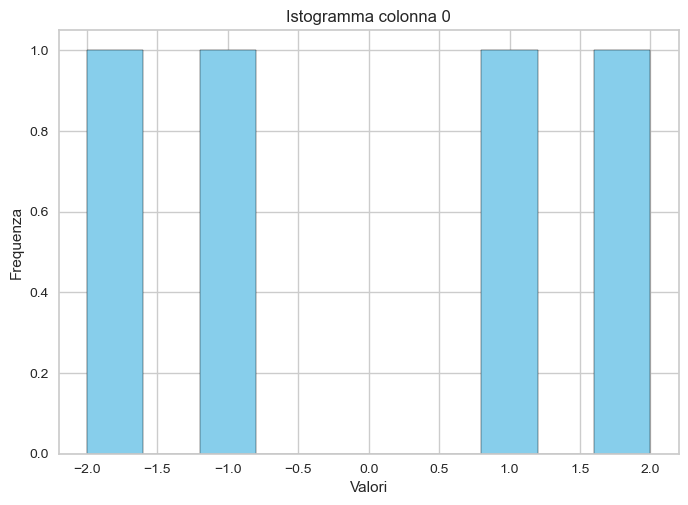

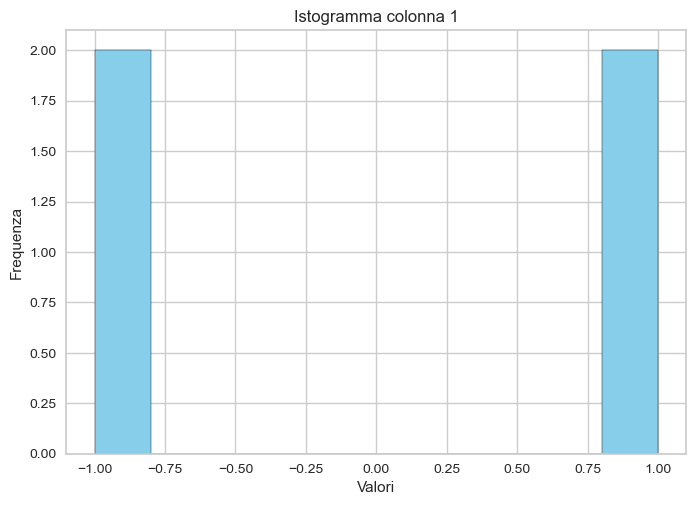

In [84]:
import matplotlib.pyplot as plt

# Creazione dell'istogramma per ciascuna colonna
for i in range(boh.shape[1]):
    plt.figure()
    plt.hist(boh[:, i], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Istogramma colonna {i}")
    plt.xlabel("Valori")
    plt.ylabel("Frequenza")
    plt.show()


In [88]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(redDf, y, test_size=0.2, random_state=42)  # ricorda di splittare prima,
                                                                                               # per evitare data leakage dal test nel train set

scaler = StandardScaler()
xScaledTrain = scaler.fit_transform(X_train)
xScaledTest = scaler.transform(X_test)
#print("Dati scalati con StandardScaler:\n", xScaledTrain)

# In alternativa con MinMaxScaler
scaler_minmax = MinMaxScaler()
xMinMaxTrain = scaler_minmax.fit_transform(X_train)
xMinMaxTest = scaler_minmax.transform(X_test)
#print("Dati scalati con MinMaxScaler:\n", X_minmax)

In [89]:
from sklearn.svm import SVC

clf1 = SVC(gamma='auto')
clf1.fit(xScaledTrain, y_train)

clf2 = SVC(gamma='auto')
clf2.fit(xMinMaxTrain, y_train)

print(clf1.score(xScaledTest,y_test))
print(clf2.score(xMinMaxTest,y_test))

0.6907536907536908
0.6138306138306139


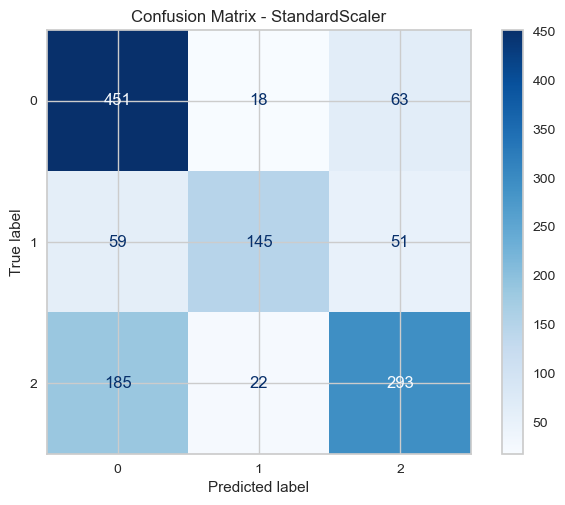

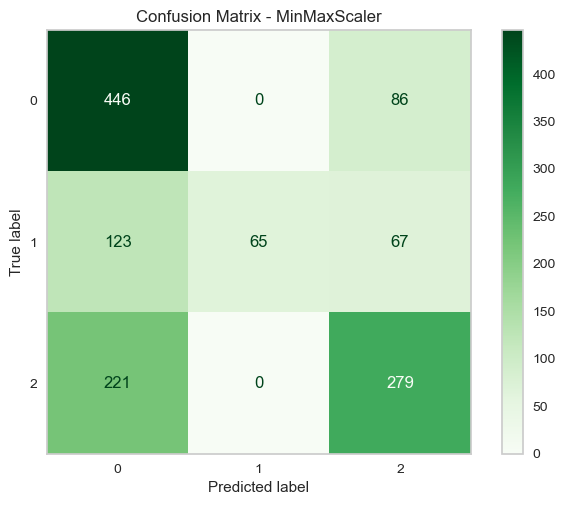

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Matrice di confusione per clf1 (StandardScaler)
y_pred_scaled = clf1.predict(xScaledTest)
cm1 = confusion_matrix(y_test, y_pred_scaled)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=clf1.classes_)
disp1.plot(cmap='Blues')
plt.title("Confusion Matrix - StandardScaler")
plt.show()

# Matrice di confusione per clf2 (MinMaxScaler)
y_pred_minmax = clf2.predict(xMinMaxTest)
cm2 = confusion_matrix(y_test, y_pred_minmax)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=clf2.classes_)
disp2.plot(cmap='Greens')
plt.title("Confusion Matrix - MinMaxScaler")
plt.grid(False)
plt.show()


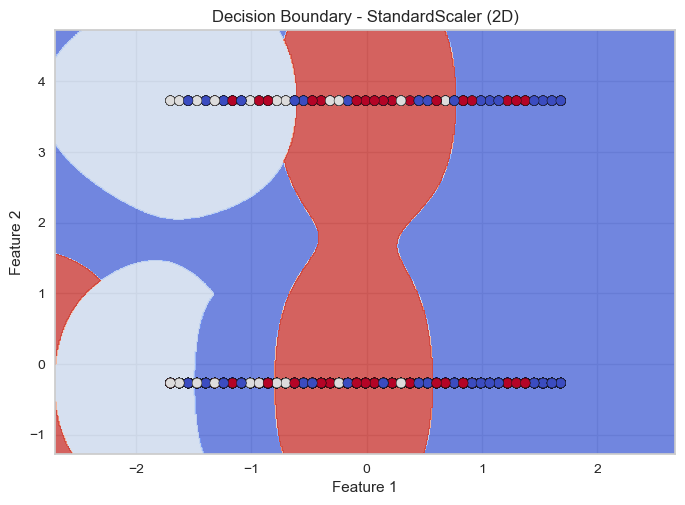

In [92]:
import numpy as np

# Seleziona solo due feature per il plot
X_train_2d = X_train.iloc[:, :2]
X_test_2d = X_test.iloc[:, :2]

# Riscala i dati per due feature
xScaledTrain_2d = scaler.fit_transform(X_train_2d)
xScaledTest_2d = scaler.transform(X_test_2d)

clf_2d = SVC(gamma='auto')
clf_2d.fit(xScaledTrain_2d, y_train)

# Meshgrid per la decision boundary
x_min, x_max = xScaledTrain_2d[:, 0].min() - 1, xScaledTrain_2d[:, 0].max() + 1
y_min, y_max = xScaledTrain_2d[:, 1].min() - 1, xScaledTrain_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predizioni sulla griglia
Z = clf_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot della decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
plt.scatter(xScaledTrain_2d[:, 0], xScaledTrain_2d[:, 1], c=y_train, edgecolors='k', cmap='coolwarm')
plt.title("Decision Boundary - StandardScaler (2D)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [95]:
# altro approccio: uso la PCA per ridurre su due componenti, poi faccio decision boundary
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
redPCA = pca.fit_transform(redDf)

In [100]:
redPCA = pd.DataFrame(data=redPCA)

In [113]:
loadings = pd.DataFrame(pca.components_, columns=redDf.columns, index=['PC1', 'PC2'])
print(loadings)

        Store  Holiday_Flag  Temperature       CPI  Unemployment      Year  \
PC1  0.192941      0.075726    -0.073517 -0.639127      0.188555 -0.696393   
PC2 -0.258845      0.103012     0.047533  0.670573     -0.049166 -0.645356   

        Month       Day  
PC1  0.150435  0.002108  
PC2  0.226166  0.020174  


In [107]:
redPCA.head()

,0,1
0,-0.021405,0.646996
1,0.151863,0.893132
2,-0.060746,0.596918
3,-0.065264,0.604942
4,-0.025954,0.651301


In [104]:
redPCA.describe()

,0,1
count,6.435000e+03,6.435000e+03
mean,3.533390e-17,-5.300086e-17
std,4.229382e-01,3.897840e-01
min,-9.071607e-01,-8.588587e-01
25%,-2.661574e-01,-2.852492e-01
50%,-1.834642e-02,4.241147e-03
75%,2.837388e-01,2.792066e-01
max,9.548279e-01,9.331627e-01


(array([[ 374.,  433.,  544.,  922., 1102.,  961.,  930.,  454.,  619.,
           96.],
        [ 123.,  578.,  618.,  880., 1166., 1178.,  723.,  649.,  425.,
           95.]]),
 array([-0.90716074, -0.72096187, -0.534763  , -0.34856414, -0.16236527,
         0.0238336 ,  0.21003247,  0.39623133,  0.5824302 ,  0.76862907,
         0.95482794]),
 <a list of 2 BarContainer objects>)

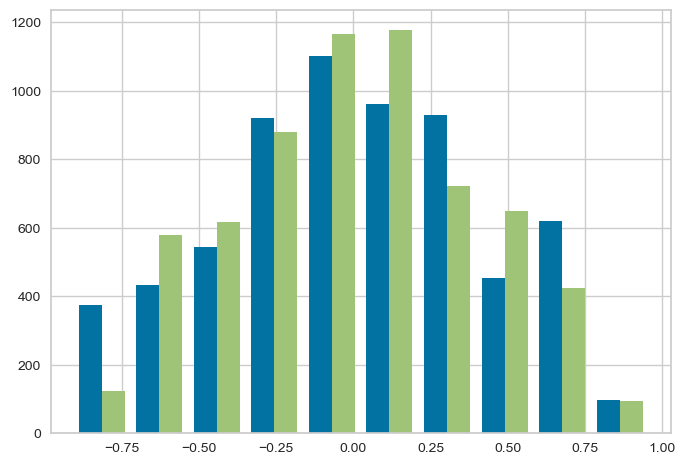

In [106]:
plt.hist(redPCA)

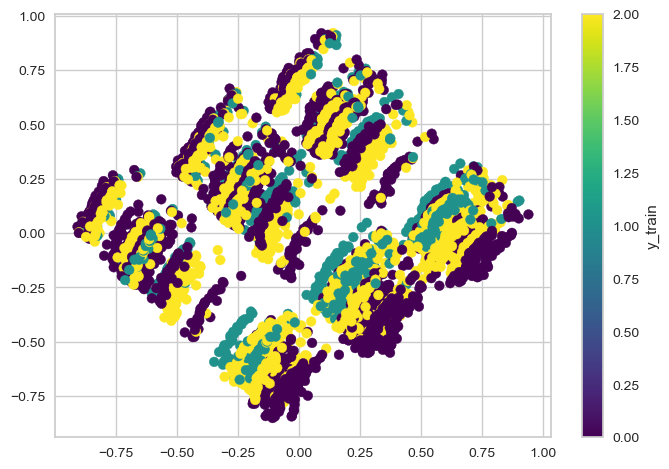

In [112]:
composedPCA = pd.DataFrame(redPCA)
composedPCA['y'] = y_train
plt.scatter(composedPCA.iloc[:,0],composedPCA.iloc[:,1], c=composedPCA['y'], cmap='viridis')
plt.colorbar(label='y_train')  # come vediamo, la PCA non garantisce separabilità delle classi

In [116]:
# provo tutti i kernel di SVC

from sklearn.svm import SVC

kernels=['linear', 'poly', 'rbf', 'sigmoid']

for kernel in kernels:
    print(kernel)
    clf1 = SVC(kernel=kernel, gamma='auto')
    clf1.fit(xScaledTrain, y_train)

    clf2 = SVC(kernel=kernel, gamma='auto')
    clf2.fit(xMinMaxTrain, y_train)

    print(clf1.score(xScaledTest,y_test))
    print(clf2.score(xMinMaxTest,y_test))

linear
0.5415695415695416
0.5407925407925408
poly
0.6418026418026418
0.49572649572649574
rbf
0.6907536907536908
0.6138306138306139
sigmoid
0.3628593628593629
0.526029526029526


In [121]:
print(forest.feature_importances_)

[0.45415545 0.00471977 0.09786846 0.17965884 0.16272367 0.01851513
 0.03716848 0.04519019]


In [122]:
X_train.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Unemployment', 'Year',
       'Month', 'Day'],
      dtype='object')

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# grid search cross validation su random forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 250, 500],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier()
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", xgb.score(X_test, y_test))

XGBoost Accuracy: 0.9254079254079254


In [123]:
# Ensemble tra xgb, random forest e decision tree
from sklearn.ensemble import VotingClassifier

eclf = VotingClassifier(
    estimators=[('xgb', xgb), ('forest', forest), ('tree', tree)],
    voting='hard')

eclf.fit(X_train,y_train)
print(accuracy_score(y_test,eclf.predict(X_test)))  # i singoli classifiers performavano al 89.5, 92.46, 92.54 --> ora ottengo 93.5, un miglioramento!


0.9347319347319347


In [127]:
# Predizioni dei singoli modelli
xgb_preds = xgb.predict(X_test)
forest_preds = forest.predict(X_test)
tree_preds = tree.predict(X_test)

# Creazione di un DataFrame con le predizioni
preds_df = pd.DataFrame({
    'XGB': xgb_preds,
    'RandomForest': forest_preds,
    'DecisionTree': tree_preds
})

# Calcolo della matrice di correlazione
correlation_matrix = preds_df.corr()

# Stampa della matrice di correlazione
print("Model Correlation Matrix:")
print(correlation_matrix)

Model Correlation Matrix:
                   XGB  RandomForest  DecisionTree
XGB           1.000000      0.957274      0.928172
RandomForest  0.957274      1.000000      0.936975
DecisionTree  0.928172      0.936975      1.000000


In [109]:
# approccio a Deep Learning --> from scratch & FastAi

import torch
import torch.nn as nn

class myModel(nn.Module):
    def __init__(self, nFeatures):
        super(myModel, self).__init__()
        self.linear1 = nn.Linear(nFeatures, 500)
        self.linear2 = nn.Linear(500, 200)
        self.linear3 = nn.Linear(200, 3)  # 3 classi

    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = self.linear3(x)  # No Sigmoid, perché useremo CrossEntropyLoss
        return x

model = myModel(nFeatures=X_train.shape[1])

In [110]:
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

105303


In [111]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
bs = 64

In [112]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# normaliza data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Creazione del DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=bs, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=bs, shuffle=False)

In [113]:
epochs = 50

for epoch in range(1,epochs + 1):

    model.train()
    running_loss = 0.0
    val_loss = 0.0
    totalTrain = 0
    counterTrain = 0

    for inputs,targets in train_loader:
        optimizer.zero_grad()
        preds = model(inputs)
        loss = criterion(preds,targets)
        loss.backward()
        optimizer.step()
        running_loss += loss

        _ , preds = torch.max(preds,1)
        totalTrain += inputs.size(0)
        counterTrain += (preds == targets).sum().item()
    
    with torch.no_grad():
        model.eval()  # necessary?
        counter = 0
        total = 0

        for inputs,targets in test_loader:
            preds = model(inputs)
            loss = criterion(preds,targets)
            val_loss += loss
            
            # calculate accuracy
            _ , preds = torch.max(preds,1)
            total += inputs.size(0)
            counter += (preds == targets).sum().item()
    if epoch % 10 == 0:
        print(f'epoch: {epoch}\n trainLoss = {running_loss/len(train_loader):.4f} trainAcc = {counterTrain/totalTrain:.2f}\n valLoss = {val_loss/len(test_loader):.4f} valAcc = {counter/total:.2f}')

epoch: 10
 trainLoss = 0.8532 trainAcc = 0.63
 valLoss = 0.8410 valAcc = 0.65
epoch: 20
 trainLoss = 0.7918 trainAcc = 0.66
 valLoss = 0.7828 valAcc = 0.67
epoch: 30
 trainLoss = 0.7513 trainAcc = 0.68
 valLoss = 0.7489 valAcc = 0.68
epoch: 40
 trainLoss = 0.7231 trainAcc = 0.69
 valLoss = 0.7239 valAcc = 0.69
epoch: 50
 trainLoss = 0.7043 trainAcc = 0.69
 valLoss = 0.7089 valAcc = 0.69


In [ ]:
# TODO: PR-Curve, AUC